In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("Salary_Data.csv")
data.tail(5)

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [3]:
data.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [5]:
#feature

X=data.iloc[:,0:1].values
X.shape

(30, 1)

In [6]:
#target

y=data.iloc[:,1].values
y.shape

(30,)

In [7]:
#separating data into 2 parts

In [8]:
from sklearn.model_selection  import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [10]:
X_train.shape

(24, 1)

In [21]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(normalize="boolean")

In [22]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize='boolean')

In [23]:
X_test

array([[1.5],
       [5.3],
       [1.3],
       [3.7],
       [4. ],
       [2.9]])

In [24]:
y_test

array([37731., 83088., 46205., 57189., 55794., 56642.])

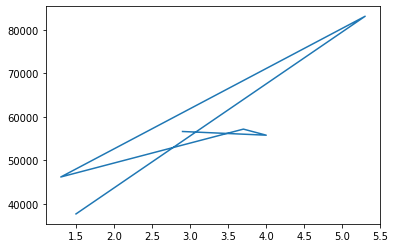

In [25]:
plt.plot(X_test,y_test)

In [26]:
regressor.predict(X_test[0].reshape(1,1))

array([39296.22202233])

In [27]:
def sal_pred(year):
    test=np.array([year])
    sal=int(regressor.predict(test[0].reshape(1,1)))
   
    return sal




In [28]:
sal_pred(3)

53627

In [30]:
sal_pred(10.5)




125284